In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here a one-dimensional heat equation is being solved:

$\frac{\partial T}{\partial t} = \frac{\partial T}{ \partial x}$

Four difference schemes are compared:
1. Explicit stable
2. Explicit unstable
3. Inexplicit stable
4. Inexplicit unstable

In [2]:
x_max, t_max = 10., 1.
dx1, dt1 = 0.1, 0.005 # stable scheme
dx2, dt2 = 0.1, 0.01 # unstable scheme
x_0 = 5
T_0 = (32+5+1)/15

In [3]:
# stable scheme
x1, t1 = np.arange(0, x_max + dx1, dx1), np.arange(0, t_max + dt1, dt1)
T1 = np.zeros([x1.size, t1.size], dtype = float)
T1[: , 0] = T_0 * (x1 - x_0) ** 2 * np.exp(-(x1 - x_0) ** 2)
T1[0, :] = T1[x1.size - 1, :] = 0

# unstable scheme
x2, t2 = np.arange(0, x_max + dx2, dx2), np.arange(0, t_max + dt2, dt2)
T2 = np.zeros([x2.size, t2.size], dtype = float)
T2[: , 0] = T_0 * (x2 - x_0) ** 2 * np.exp(-(x2 - x_0) ** 2)
T2[0, :] = T2[x2.size - 1, :] = 0

In [4]:
# explicit stable difference scheme
for n in range (0, t1.size - 1):
    for j in range(1, x1.size - 2):
        T1[j, n+1] = T1[j, n] + dt1 / dx1 ** 2 * (T1[j + 1, n] - 2 * T1[j, n] + T1[j - 1, n])
        
# explicit unstable difference scheme
for n in range (0, t2.size - 1):
    for j in range(1, x2.size - 2):
        T2[j, n+1] = T2[j, n] + dt2 / dx2 ** 2 * (T2[j + 1, n] - 2 * T2[j, n] + T2[j - 1, n])

<ipython-input-5-e5ba97f42b5e>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax11 = plt.subplot2grid((1 , 2), (0 , 0), rowspan = 1)
<ipython-input-5-e5ba97f42b5e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax12 = plt.subplot2grid((1 , 2), (0 , 1), rowspan = 1)


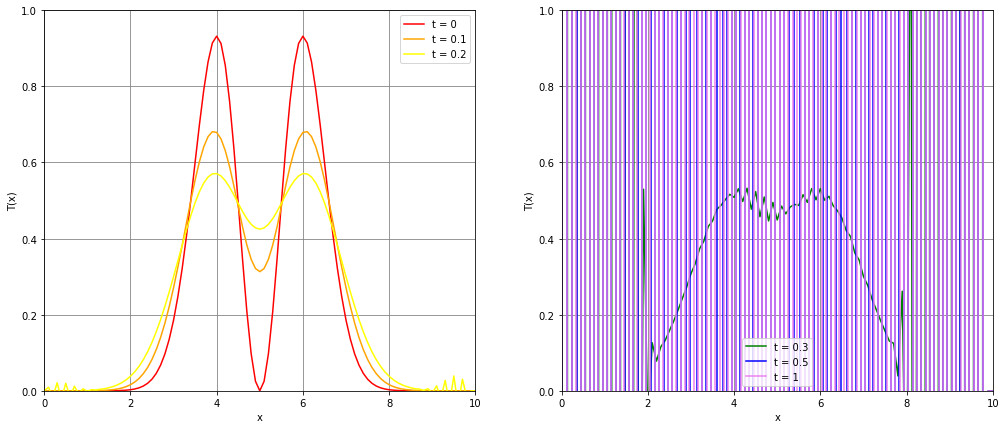

In [5]:
fig1, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (17 , 7))

ax11 = plt.subplot2grid((1 , 2), (0 , 0), rowspan = 1)
ax12 = plt.subplot2grid((1 , 2), (0 , 1), rowspan = 1)

ax11.plot(x2, T2[:, t2 == 0], 'red', label = 't = 0' )
ax11.plot(x2, T2[:, t2 == 0.1], 'orange', label = 't = 0.1' )
ax11.plot(x2, T2[:, t2 == 0.2], 'yellow', label = 't = 0.2' )

ax12.plot(x2, T2[:, t2 == 0.3], 'green', label = 't = 0.3' )
ax12.plot(x2, T2[:, t2 == 0.5], 'blue', label = 't = 0.5' )
ax12.plot(x2, T2[:, t2 == 1], 'violet', label = 't = 1' )

for ax in fig1.axes:
    ax.grid(True, color = 'grey')
    ax.set_xlabel('x')
    ax.set_ylabel('T(x)')
    ax.axis([0., 10., 0., 1.])
    ax.legend()

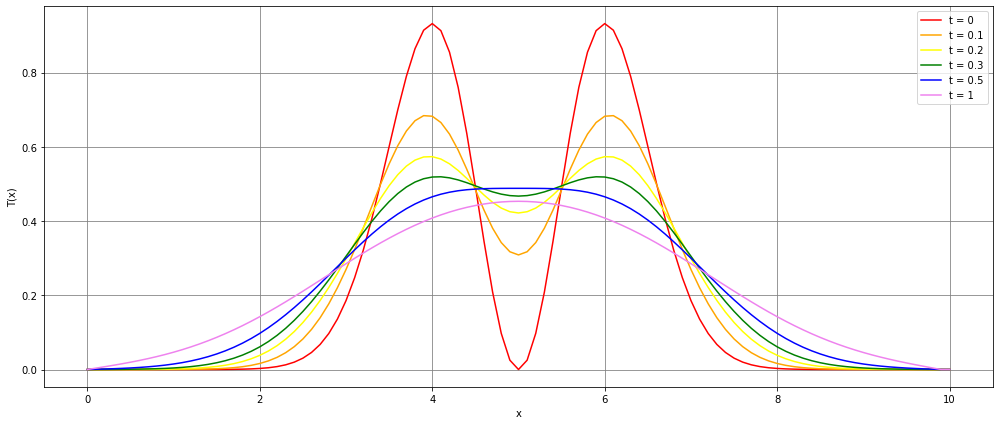

In [6]:
fig2, ax2 = plt.subplots(figsize = (17, 7))

ax2.plot(x1, T1[:, t1 == 0], 'red', label = 't = 0' )
ax2.plot(x1, T1[:, t1 == 0.1], 'orange', label = 't = 0.1' )
ax2.plot(x1, T1[:, t1 == 0.2], 'yellow', label = 't = 0.2' )
ax2.plot(x1, T1[:, t1 == 0.3], 'green', label = 't = 0.3' )
ax2.plot(x1, T1[:, t1 == 0.5], 'blue', label = 't = 0.5' )
ax2.plot(x1, T1[:, t1 == 1], 'violet', label = 't = 1' )

for ax2 in fig2.axes:
    ax2.grid(True, color = 'grey')
    ax2.set_xlabel('x')
    ax2.set_ylabel('T(x)')
    ax2.legend()

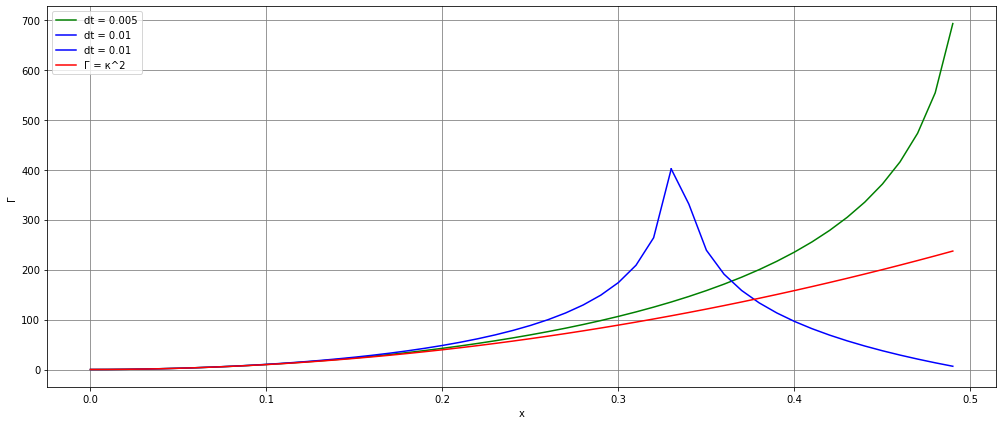

In [7]:
q = np.arange(0, 0.5, 0.01)
kappa = q*np.pi/dx1

fig4, ax4 = plt.subplots(figsize = (17, 7))

ax4.plot(q, np.real(-(1/dt1)*np.log(1 - 4*dt1/dx1 ** 2 * np.sin(np.pi*q/2) ** 2)), 'green', label = 'dt = 0.005')
ax4.plot(q[ : 34], np.real(-(1/dt2)*np.log(1 - 4*dt2/dx2 ** 2 * np.sin(np.pi*q[:34]/2) ** 2)), 'blue', label = 'dt = 0.01')
ax4.plot(q[33:], np.real(-(1/dt2)*np.log(np.abs(1 - 4*dt2/dx2 ** 2 * np.sin(np.pi*q[33:]/2) ** 2))), 'blue', label = 'dt = 0.01')
ax4.plot(q, kappa ** 2, 'red', label = 'Г = к^2')

for ax4 in fig4.axes:
    ax4.grid(True, color = 'grey')
    ax4.set_xlabel('x')
    ax4.set_ylabel('Г')
    ax4.legend()

In [8]:
# inexplicit stable difference scheme

for n in range(0, t1.size - 1):
    d1 = np.zeros(x1.size, dtype = float)
    sigma1 = np.zeros(x1.size, dtype = float)
    for j in range (2, x1.size - 1):
        d1[j] = 1/(2*dx1**2/dt1+2-d1[j-1])
        sigma1[j] = ((-T1[j,n] + 2*(1 - dx1 ** 2 / dt1)*T1[j-1,n] - T1[j-2,n]) - sigma1[j-1])/(d1[j-1] - 2*dx1**2/dt1-2)
    for j in range (x1.size - 2, 0, -1):
        T1[j,n+1] = d1[j+1]*T1[j+1,n+1] + sigma1[j+1]
        
# inexplicit unstable difference scheme

for n in range(0, t2.size - 1):
    d2 = np.zeros(x2.size, dtype = float)
    sigma2 = np.zeros(x2.size, dtype = float)
    for j in range (2, x2.size - 1):
        d2[j] = 1/(2*dx2**2/dt2+2-d2[j-1])
        sigma2[j] = ((-T2[j,n] + 2*(1 - dx2 ** 2 / dt2)*T2[j-1,n] - T2[j-2,n]) - sigma2[j-1])/(d2[j-1] - 2*dx2**2/dt2-2)
    for j in range (x2.size - 2, 0, -1):
        T2[j,n+1] = d2[j+1]*T2[j+1,n+1] + sigma2[j+1]
        

<ipython-input-12-249cdf8850c7>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax31 = plt.subplot2grid((1 , 2), (0 , 0), rowspan = 1)
<ipython-input-12-249cdf8850c7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax32 = plt.subplot2grid((1 , 2), (0 , 1), rowspan = 1)


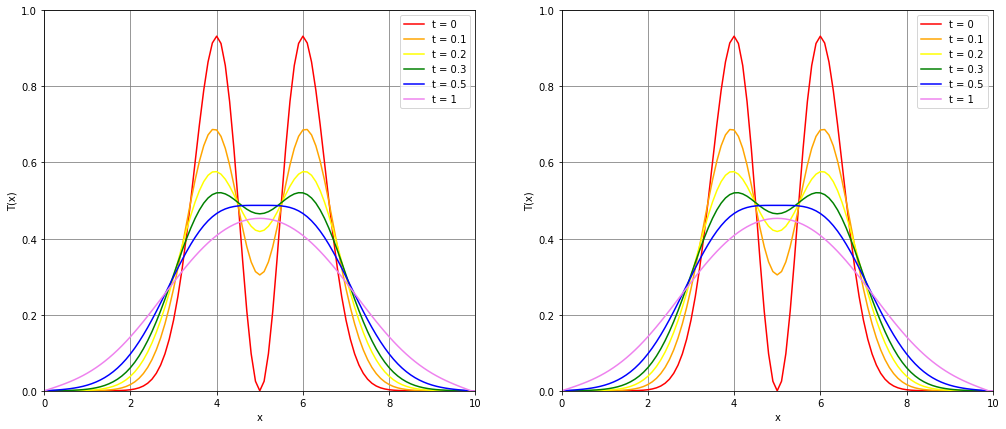

In [12]:
fig3, ax3 = plt.subplots(nrows = 2, ncols = 2, figsize = (17 , 7))

ax31 = plt.subplot2grid((1 , 2), (0 , 0), rowspan = 1)
ax32 = plt.subplot2grid((1 , 2), (0 , 1), rowspan = 1)

ax31.plot(x1, T1[:, t1 == 0], 'red', label = 't = 0' )
ax31.plot(x1, T1[:, t1 == 0.1], 'orange', label = 't = 0.1' )
ax31.plot(x1, T1[:, t1 == 0.2], 'yellow', label = 't = 0.2' )
ax31.plot(x1, T1[:, t1 == 0.3], 'green', label = 't = 0.3' )
ax31.plot(x1, T1[:, t1 == 0.5], 'blue', label = 't = 0.5' )
ax31.plot(x1, T1[:, t1 == 1], 'violet', label = 't = 1' )

ax32.plot(x2, T2[:, t2 == 0], 'red', label = 't = 0' )
ax32.plot(x2, T2[:, t2 == 0.1], 'orange', label = 't = 0.1' )
ax32.plot(x2, T2[:, t2 == 0.2], 'yellow', label = 't = 0.2' )
ax32.plot(x2, T2[:, t2 == 0.3], 'green', label = 't = 0.3' )
ax32.plot(x2, T2[:, t2 == 0.5], 'blue', label = 't = 0.5' )
ax32.plot(x2, T2[:, t2 == 1], 'violet', label = 't = 1' )

for ax3 in fig3.axes:
    ax3.grid(True, color = 'grey')
    ax3.set_xlabel('x')
    ax3.set_ylabel('T(x)')
    ax3.axis([0., 10., 0., 1.])
    ax3.legend()

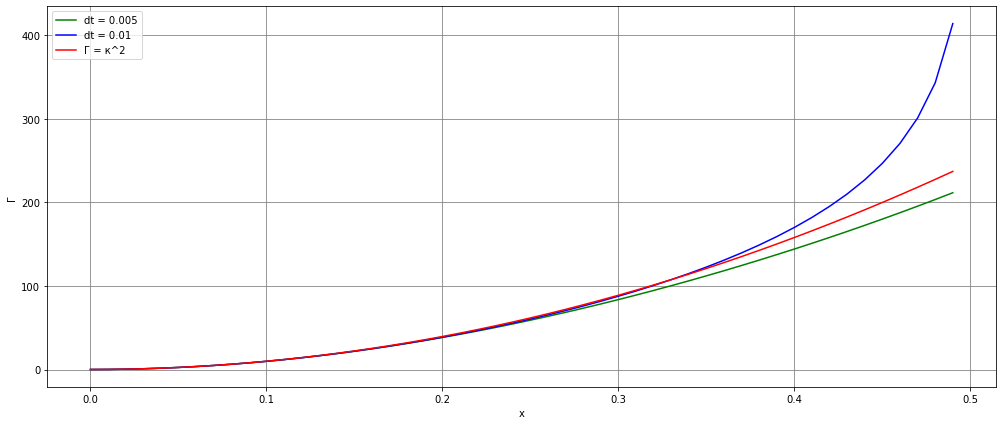

In [10]:
q = np.arange(0, 0.5, 0.01)
kappa = q*np.pi/dx1

fig4, ax4 = plt.subplots(figsize = (17, 7))

ax4.plot(q, np.real((1/dt1)*np.log((1 + 2*dt1/dx1 ** 2 * np.sin(np.pi*q/2) ** 2)/(1 - 2*dt1/dx1 ** 2 * np.sin(np.pi*q/2) ** 2))), 'green', label = 'dt = 0.005')
ax4.plot(q, np.real((1/dt2)*np.log((1 + 2*dt2/dx1 ** 2 * np.sin(np.pi*q/2) ** 2)/(1 - 2*dt2/dx1 ** 2 * np.sin(np.pi*q/2) ** 2))), 'blue', label = 'dt = 0.01')
ax4.plot(q, kappa ** 2, 'red', label = 'Г = к^2')

for ax4 in fig4.axes:
    ax4.grid(True, color = 'grey')
    ax4.set_xlabel('x')
    ax4.set_ylabel('Г')
    ax4.legend()